In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')   # make a connection between google collab and google drive

# Specify the file path
file_path = '/content/drive/My Drive/titanic3.xls'

data_frame=pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_frame

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [ ]:
print(data_frame.shape)
print(data_frame.columns)


(1309, 14)
Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


In [ ]:
print(data_frame.head())    #l'entete de donnees

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [ ]:
#==================== drop a column from data frame =========================

data= data_frame.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [ ]:
#====================== display the informations about all colonnes ==============
data.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [ ]:
#============== delete lines with null value in one of its columns ===================

data=data.dropna(axis=0) # or we can use : data.dropna(axis=0, inplace=True).
#data.dropna(axis=0, inplace=True) : allow to apply the modification in data
data.shape

(1046, 4)

In [ ]:
#============== numbre of people per  class ===============

data['pclass'].value_counts()

pclass
3    501
1    284
2    261
Name: count, dtype: int64

<Axes: xlabel='pclass'>

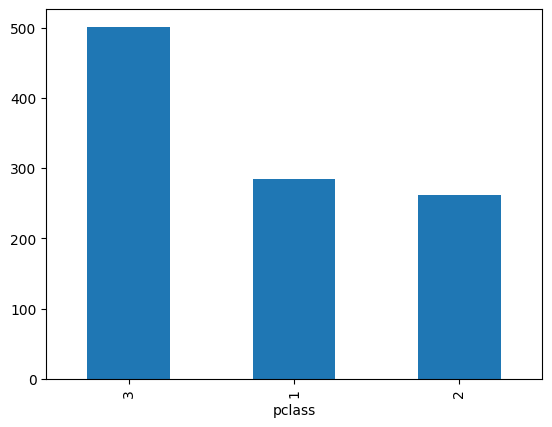

In [ ]:
data['pclass'].value_counts().plot.bar()

<Axes: >

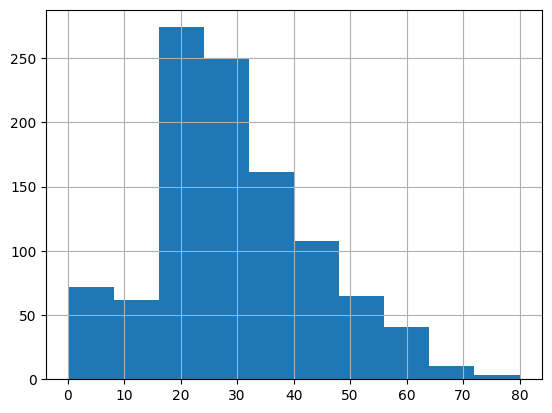

In [ ]:
data['age'].hist()

In [ ]:
data.groupby(['sex']).mean()

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


In [ ]:
data.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [ ]:
#================= change the index of data frame ====================
data= data.set_index('pclass')
data['age']

pclass
1    29.0000
1     0.9167
1     2.0000
1    30.0000
1    25.0000
      ...   
3    45.5000
3    14.5000
3    26.5000
3    27.0000
3    29.0000
Name: age, Length: 1046, dtype: float64

In [ ]:
#================ Series ==============
data['age'][0:10]

pclass
1    29.0000
1     0.9167
1     2.0000
1    30.0000
1    25.0000
1    48.0000
1    63.0000
1    39.0000
1    53.0000
1    71.0000
Name: age, dtype: float64

In [ ]:
data['age']<10

pclass
1    False
1     True
1     True
1    False
1    False
     ...  
3    False
3    False
3    False
3    False
3    False
Name: age, Length: 1046, dtype: bool

In [ ]:
from google.colab import drive
drive.mount('/content/drive')   # make a connection between google collab and google drive

# Specify the file path
file_path = '/content/drive/My Drive/BTC-USD.csv'

bitcoin = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
bitcoin

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-16,30297.472656,30437.560547,30089.669922,30249.132813,30249.132813,8.516564e+09
1,2023-07-17,30249.626953,30336.400391,29685.783203,30145.888672,30145.888672,1.324016e+10
2,2023-07-18,30147.070313,30233.656250,29556.427734,29856.562500,29856.562500,1.313890e+10
3,2023-07-19,29862.046875,30184.181641,29794.269531,29913.923828,29913.923828,1.212860e+10
4,2023-07-20,29915.250000,30195.531250,29638.095703,29792.015625,29792.015625,1.465521e+10
...,...,...,...,...,...,...,...
362,2024-07-12,57341.195313,58532.554688,56590.175781,57899.464844,57899.464844,2.560481e+10
363,2024-07-13,57908.738281,59787.078125,57796.441406,59231.953125,59231.953125,1.708006e+10
364,2024-07-14,59225.250000,61329.527344,59225.250000,60787.792969,60787.792969,2.222342e+10
365,2024-07-15,60815.457031,64870.152344,60704.929688,64870.152344,64870.152344,3.809453e+10


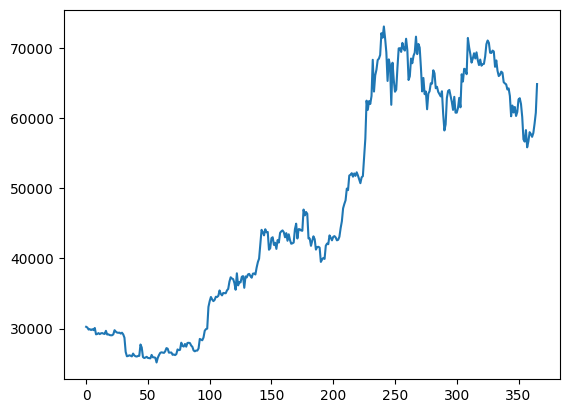

In [ ]:
bitcoin['Close'].plot()   # x= index and y= valeurs de close colonne
plt.show()

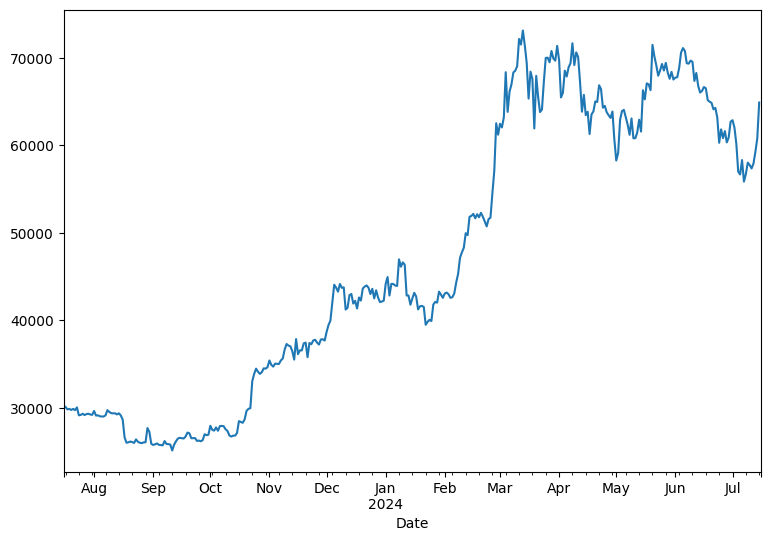

In [ ]:
#======== change the values of index ===========

bitcoin = pd.read_csv(file_path, index_col='Date', parse_dates=True)  # tell to panda that the index colonne is of Date type
bitcoin['Close'].plot(figsize=(9,6))
plt.show()

In [ ]:
bitcoin.index


DatetimeIndex(['2023-07-16', '2023-07-17', '2023-07-18', '2023-07-19',
               '2023-07-20', '2023-07-21', '2023-07-22', '2023-07-23',
               '2023-07-24', '2023-07-25',
               ...
               '2024-07-07', '2024-07-08', '2024-07-09', '2024-07-10',
               '2024-07-11', '2024-07-12', '2024-07-13', '2024-07-14',
               '2024-07-15', '2024-07-16'],
              dtype='datetime64[ns]', name='Date', length=367, freq=None)

<Axes: xlabel='Date'>

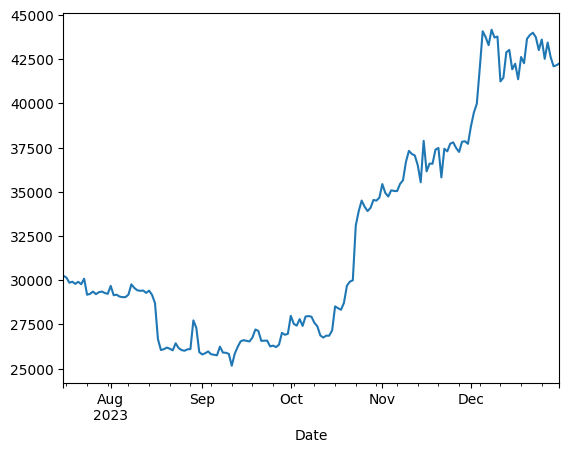

In [ ]:
bitcoin.loc['2023']['Close'].plot()

<Axes: xlabel='Date'>

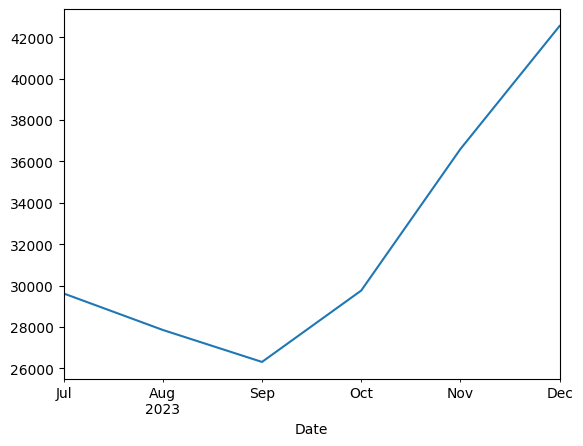

In [ ]:
bitcoin.loc['2023','Close'].resample('M').mean().plot()
bitcoin.loc['2023','Close'].resample('2M').mean().plot()

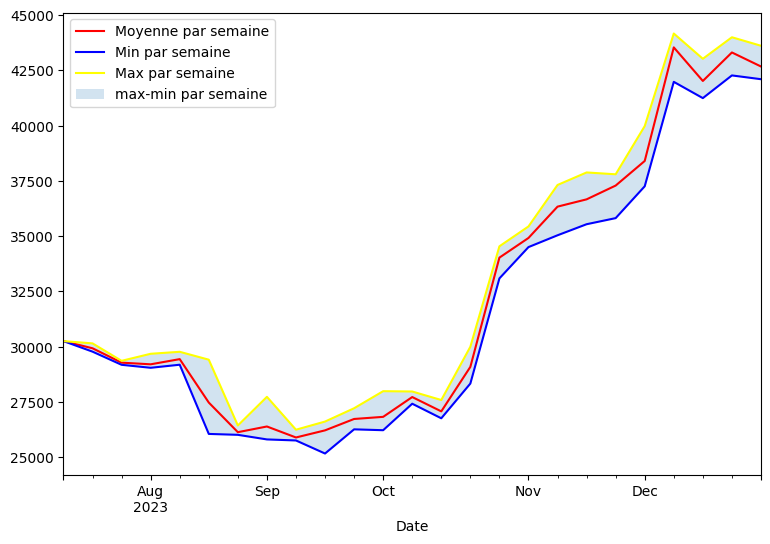

In [ ]:
m = bitcoin.loc['2023', 'Close'].resample('W').agg(['mean', 'min', 'max', 'std'])
plt.figure(figsize=(9, 6))
m.loc[:, 'mean'].plot(c='red', label='Moyenne par semaine')
m.loc[:, 'min'].plot(c='blue', label='Min par semaine')
m.loc[:, 'max'].plot(c='yellow', label='Max par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='max-min par semaine')  # fll the zone between max and min
plt.legend()
plt.show()


In [ ]:
print(bitcoin.loc['2023', 'Close'])

Date
2023-07-16    30249.132813
2023-07-17    30145.888672
2023-07-18    29856.562500
2023-07-19    29913.923828
2023-07-20    29792.015625
                  ...     
2023-12-27    43442.855469
2023-12-28    42627.855469
2023-12-29    42099.402344
2023-12-30    42156.902344
2023-12-31    42265.187500
Name: Close, Length: 169, dtype: float64


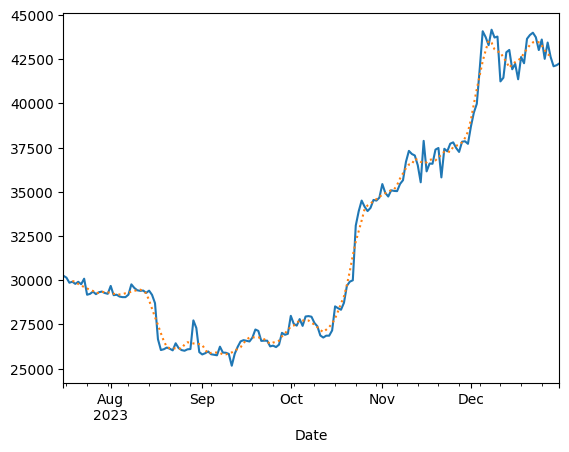

In [ ]:
bitcoin.loc['2023', 'Close'].plot()
bitcoin.loc['2023', 'Close'].rolling(window=7, center=True).mean().plot(ls=':')
plt.show()

In [ ]:
bitcoin.loc['2023', 'Close'].mean()

32341.811991591716

Date
2023-07-16    30249.132813
2023-07-17    30175.386998
2023-07-18    29971.012320
2023-07-19    29935.859308
2023-07-20    29848.660179
                  ...     
2023-12-27    43229.877720
2023-12-28    42868.664369
2023-12-29    42407.107154
2023-12-30    42256.984268
2023-12-31    42261.906207
Name: Close, Length: 169, dtype: float64


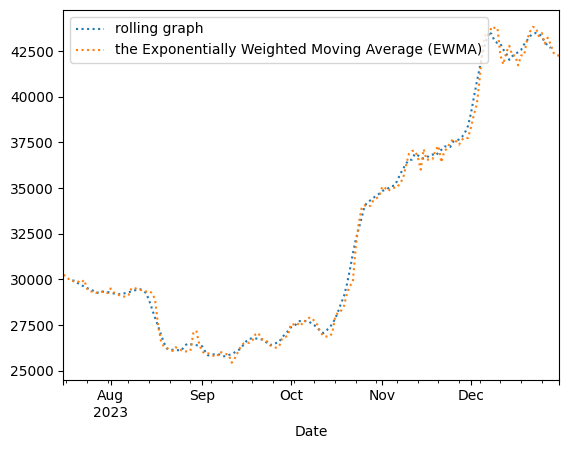

In [ ]:
bitcoin.loc['2023', 'Close'].rolling(window=7, center=True).mean().plot(ls=':', label='rolling graph')
bitcoin.loc['2023', 'Close'].ewm(alpha=0.6).mean().plot(ls=':', label='the Exponentially Weighted Moving Average (EWMA)')
print(bitcoin.loc['2023', 'Close'].ewm(alpha=0.6).mean())
plt.legend()
plt.show()

In [ ]:
data= bitcoin.copy()
data['buy']=np.zero(len(data))
data['sell']=np.zero(len(data))
data['rollingMax']= data['Close'].shift(1).rolling(window=28).max()
data['rollingMin']= data['Close'].shift(1).rolling(window=28).min()
data.loc[data['rollingMax']< data['Close'], 'buy']=1
data.loc[data['rollingMax']> data['Close'], 'sell']=-1